## loading necessary libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Displaying the image

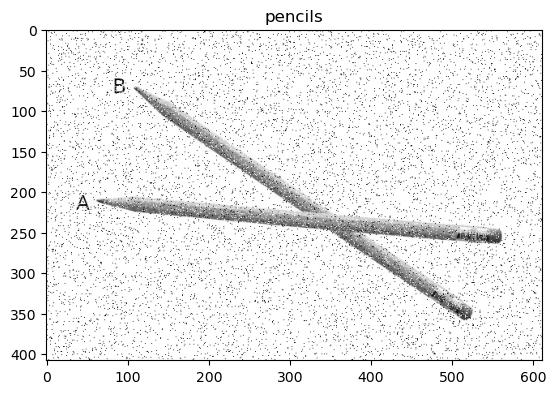

In [2]:
# Read the image in grayscale
img = cv2.imread(r"C:\Users\vamsh\Downloads\CV_Assignment\CV_Assignment\2_pencils.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
plt.imshow(img, cmap='gray')
plt.title('pencils')
plt.axis('on')
plt.show()


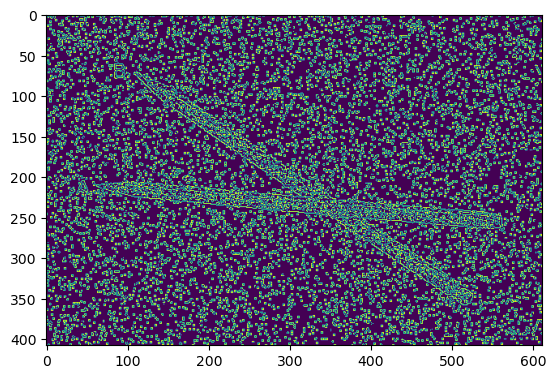

In [3]:
edges=cv2.Canny(img,50,150,apertureSize=3)
plt.imshow(edges)

## calculating the length and angle of two pencils

In [4]:
# Load the image
image = cv2.imread(r"C:\Users\vamsh\Downloads\CV_Assignment\CV_Assignment\2_pencils.jpg")
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use HoughLines to detect lines in the edge-detected image
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Extract lengths and angles of all detected lines
lengths = [np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) for line in lines for x1, y1, x2, y2 in line]
angles = [np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi for line in lines for x1, y1, x2, y2 in line]

# Sort the lengths and keep the two longest
sorted_lengths_indices = np.argsort(lengths)[-2:]

# Calculate the angle between the two pencils
pencil_angles = [angles[i] for i in sorted_lengths_indices]
angle_between_pencils = abs(pencil_angles[0] - pencil_angles[1])

# Assuming the image has a PPI (pixels per inch) that we can use to convert the pixel measurement to centimeters.
PPI = 96  # This is an assumption and should be replaced with the actual PPI if known
# There are 2.54 centimeters in an inch.

# Calculate the length of Pencil-B in centimeters
pencil_lengths = [lengths[i] for i in sorted_lengths_indices]
length_pencil_b_cm = pencil_lengths[1] / PPI * 2.54

# Output the length of Pencil-B and the angle between the pencils
print('Length of Pencil-B in cm:', length_pencil_b_cm)
print('Angle between pencils:', angle_between_pencils)

Length of Pencil-B in cm: 17.811411210632247
Angle between pencils: 29.86818082596552
